Candidate No: BSYP1

In [1]:
from scipy.io import arff
import urllib.request
import io
import mglearn
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read in data

In [3]:
#read in diabetic retinopathy data
from scipy.io import arff

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

print("Data object type = ",type(data))

#Data description from the website
# 0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
# 1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
# 2-7) The results of MA detection. Each feature value stand for the
# number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
# 8-15) contain the same information as 2-7) for exudates. However,
# as exudates are represented by a set of points rather than the number of
# pixels constructing the lesions, these features are normalized by dividing the
# number of lesions with the diameter of the ROI to compensate different image
# sizes.
# 16) The euclidean distance of the center of
# the macula and the center of the optic disc to provide important information
# regarding the patientâ€™s condition. This feature
# is also normalized with the diameter of the ROI.
# 17) The diameter of the optic disc.
# 18) The binary result of the AM/FM-based classification.
# 19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.


#create column names from above data description
cols=["qual_assessment",
        "pre_screening",
        "ma_1",
        "ma_2",
        "ma_3",
        "ma_4",
        "ma_5",
        "ma_6",
        "ex_1",
        "ex_2",
        "ex_3",
        "ex_4",
        "ex_5",
        "ex_6",
        "ex_7",
        "ex_8",
        "euclidean_dist",
        "diameter_optic",
        "am_fm",
        "class"]

#create dataframe from numpy array - easier to visualise
df = pd.DataFrame(data)
df.columns=cols
#agrees with website description
print("Data has rows, cols:", df.shape) 

df.head()

Data object type =  <class 'numpy.ndarray'>
Data has rows, cols: (1151, 20)


qual_assessment  pre_screening  ma_1  ma_2  ma_3  ma_4  ma_5  ma_6  \
0              1.0            1.0  22.0  22.0  22.0  19.0  18.0  14.0   
1              1.0            1.0  24.0  24.0  22.0  18.0  16.0  13.0   
2              1.0            1.0  62.0  60.0  59.0  54.0  47.0  33.0   
3              1.0            1.0  55.0  53.0  53.0  50.0  43.0  31.0   
4              1.0            1.0  44.0  44.0  44.0  41.0  39.0  27.0   

        ex_1       ex_2       ex_3      ex_4      ex_5      ex_6      ex_7  \
0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864  0.003923   
1  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903  0.003903   
2  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252  0.041817   
3  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434  0.007653   
4  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000  0.000000   

       ex_8  euclidean_dist  diameter_optic  am_fm class  
0  0.003923        0.486903        0.100025    1.0  b'0'  
1  0.003903        0.520908        0.144414    0.0  b'0'  
2  0.007744        0.530904        0.128548    0.0  b'1'  
3  0.001531        0.483284        0.114790    0.0  b'0'  
4  0.000000        0.475935        0.123572    0.0  b'1'

### EDA and data cleaning

In [4]:
def examine1(df):
    print(df.shape)
    print(df.info(null_counts=True))
    print(df.describe(include=[np.number]).T)
    print(df.describe(include=[np.object, pd.Categorical]).T)
    return df.head()

def examine2(df):
    print(df.shape)
    print(df.info(null_counts=True))
    print(df.describe(include=[np.number]).T)
    return df.head()

examine1(df)

(1151, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
qual_assessment    1151 non-null float64
pre_screening      1151 non-null float64
ma_1               1151 non-null float64
ma_2               1151 non-null float64
ma_3               1151 non-null float64
ma_4               1151 non-null float64
ma_5               1151 non-null float64
ma_6               1151 non-null float64
ex_1               1151 non-null float64
ex_2               1151 non-null float64
ex_3               1151 non-null float64
ex_4               1151 non-null float64
ex_5               1151 non-null float64
ex_6               1151 non-null float64
ex_7               1151 non-null float64
ex_8               1151 non-null float64
euclidean_dist     1151 non-null float64
diameter_optic     1151 non-null float64
am_fm              1151 non-null float64
class              1151 non-null object
dtypes: float64(19), object(1)
memory usage: 179.9+ KB
None
   

qual_assessment  pre_screening  ma_1  ma_2  ma_3  ma_4  ma_5  ma_6  \
0              1.0            1.0  22.0  22.0  22.0  19.0  18.0  14.0   
1              1.0            1.0  24.0  24.0  22.0  18.0  16.0  13.0   
2              1.0            1.0  62.0  60.0  59.0  54.0  47.0  33.0   
3              1.0            1.0  55.0  53.0  53.0  50.0  43.0  31.0   
4              1.0            1.0  44.0  44.0  44.0  41.0  39.0  27.0   

        ex_1       ex_2       ex_3      ex_4      ex_5      ex_6      ex_7  \
0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864  0.003923   
1  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903  0.003903   
2  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252  0.041817   
3  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434  0.007653   
4  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000  0.000000   

       ex_8  euclidean_dist  diameter_optic  am_fm class  
0  0.003923        0.486903        0.100025    1.0  b'0'  
1  0.003903        0.520908        0.144414    0.0  b'0'  
2  0.007744        0.530904        0.128548    0.0  b'1'  
3  0.001531        0.483284        0.114790    0.0  b'0'  
4  0.000000        0.475935        0.123572    0.0  b'1'

1. No missing values in this dataset
2. 1151 records of which 611 are labelled with condition, 540 without.

In [5]:
#check binary variables are indeed binary
print(df['qual_assessment'].value_counts())
print(df['pre_screening'].value_counts())
print(df['am_fm'].value_counts())

1.0    1147
0.0       4
Name: qual_assessment, dtype: int64
1.0    1057
0.0      94
Name: pre_screening, dtype: int64
0.0    764
1.0    387
Name: am_fm, dtype: int64


In [6]:
#re-order columns in dataframe so that (1) 1st column is label and (2) subsequent columns have binary variables first
#this will be useful later when a custom scaler class is created in order not to scale the binary variables

cols =["class",
        "qual_assessment",
        "pre_screening",
        "am_fm",
        "ma_1",
        "ma_2",
        "ma_3",
        "ma_4",
        "ma_5",
        "ma_6",
        "ex_1",
        "ex_2",
        "ex_3",
        "ex_4",
        "ex_5",
        "ex_6",
        "ex_7",
        "ex_8",
        "euclidean_dist",
        "diameter_optic"]
df = df[cols]
df.head()

class  qual_assessment  pre_screening  am_fm  ma_1  ma_2  ma_3  ma_4  ma_5  \
0  b'0'              1.0            1.0    1.0  22.0  22.0  22.0  19.0  18.0   
1  b'0'              1.0            1.0    0.0  24.0  24.0  22.0  18.0  16.0   
2  b'1'              1.0            1.0    0.0  62.0  60.0  59.0  54.0  47.0   
3  b'0'              1.0            1.0    0.0  55.0  53.0  53.0  50.0  43.0   
4  b'1'              1.0            1.0    0.0  44.0  44.0  44.0  41.0  39.0   

   ma_6       ex_1       ex_2       ex_3      ex_4      ex_5      ex_6  \
0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

       ex_7      ex_8  euclidean_dist  diameter_optic  
0  0.003923  0.003923        0.486903        0.100025  
1  0.003903  0.003903        0.520908        0.144414  
2  0.041817  0.007744        0.530904        0.128548  
3  0.007653  0.001531        0.483284        0.114790  
4  0.000000  0.000000        0.475935        0.123572

In [7]:
#change binary variables to int
df.qual_assessment = df.qual_assessment.astype(int)
df.pre_screening = df.pre_screening.astype(int)
df.am_fm = df.am_fm.astype(int)
print(df.head())

#change class label to 1,0
df['class'] = df['class'].apply(lambda x: 0 if x == b'0' else 1)
print("class :\n", df['class'].value_counts())

  class  qual_assessment  pre_screening  am_fm  ma_1  ma_2  ma_3  ma_4  ma_5  \
0  b'0'                1              1      1  22.0  22.0  22.0  19.0  18.0   
1  b'0'                1              1      0  24.0  24.0  22.0  18.0  16.0   
2  b'1'                1              1      0  62.0  60.0  59.0  54.0  47.0   
3  b'0'                1              1      0  55.0  53.0  53.0  50.0  43.0   
4  b'1'                1              1      0  44.0  44.0  44.0  41.0  39.0   

   ma_6       ex_1       ex_2       ex_3      ex_4      ex_5      ex_6  \
0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

       ex_7      ex_8  euclidean_dist  diameter_optic  
0  0.003923  0.003

In [8]:
examine2(df)

(1151, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
class              1151 non-null int64
qual_assessment    1151 non-null int32
pre_screening      1151 non-null int32
am_fm              1151 non-null int32
ma_1               1151 non-null float64
ma_2               1151 non-null float64
ma_3               1151 non-null float64
ma_4               1151 non-null float64
ma_5               1151 non-null float64
ma_6               1151 non-null float64
ex_1               1151 non-null float64
ex_2               1151 non-null float64
ex_3               1151 non-null float64
ex_4               1151 non-null float64
ex_5               1151 non-null float64
ex_6               1151 non-null float64
ex_7               1151 non-null float64
ex_8               1151 non-null float64
euclidean_dist     1151 non-null float64
diameter_optic     1151 non-null float64
dtypes: float64(16), int32(3), int64(1)
memory usage: 166.4 KB
None
  

class  qual_assessment  pre_screening  am_fm  ma_1  ma_2  ma_3  ma_4  ma_5  \
0      0                1              1      1  22.0  22.0  22.0  19.0  18.0   
1      0                1              1      0  24.0  24.0  22.0  18.0  16.0   
2      1                1              1      0  62.0  60.0  59.0  54.0  47.0   
3      0                1              1      0  55.0  53.0  53.0  50.0  43.0   
4      1                1              1      0  44.0  44.0  44.0  41.0  39.0   

   ma_6       ex_1       ex_2       ex_3      ex_4      ex_5      ex_6  \
0  14.0  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1  13.0  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
2  33.0  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
3  31.0  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
4  27.0  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

       ex_7      ex_8  euclidean_dist  diameter_optic  
0  0.003923  0.003923        0.486903        0.100025  
1  0.003903  0.003903        0.520908        0.144414  
2  0.041817  0.007744        0.530904        0.128548  
3  0.007653  0.001531        0.483284        0.114790  
4  0.000000  0.000000        0.475935        0.123572

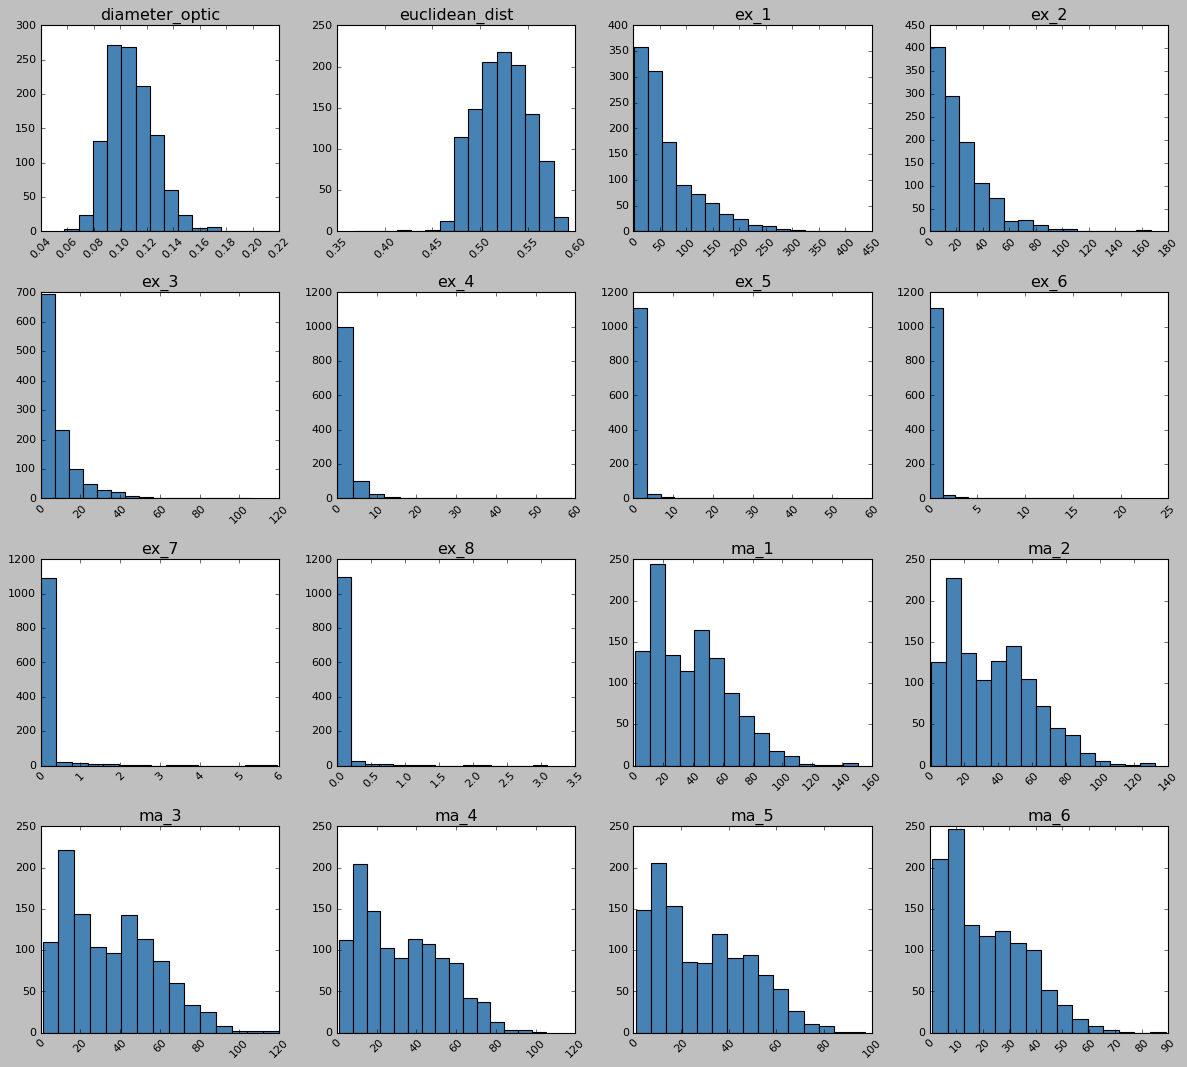

In [9]:
#create histograms for continuous variables, include class in this dataset for later use
cont = df[["ma_1",
        "ma_2",
        "ma_3",
        "ma_4",
        "ma_5",
        "ma_6",
        "ex_1",
        "ex_2",
        "ex_3",
        "ex_4",
        "ex_5",
        "ex_6",
        "ex_7",
        "ex_8",
        "euclidean_dist",
        "diameter_optic",
        "class"]]
fig = cont.iloc[:,:-1].hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   


Apart from euclidean_dist and diameter optic, ex and ma variables show right skew <br>
May need normalisation

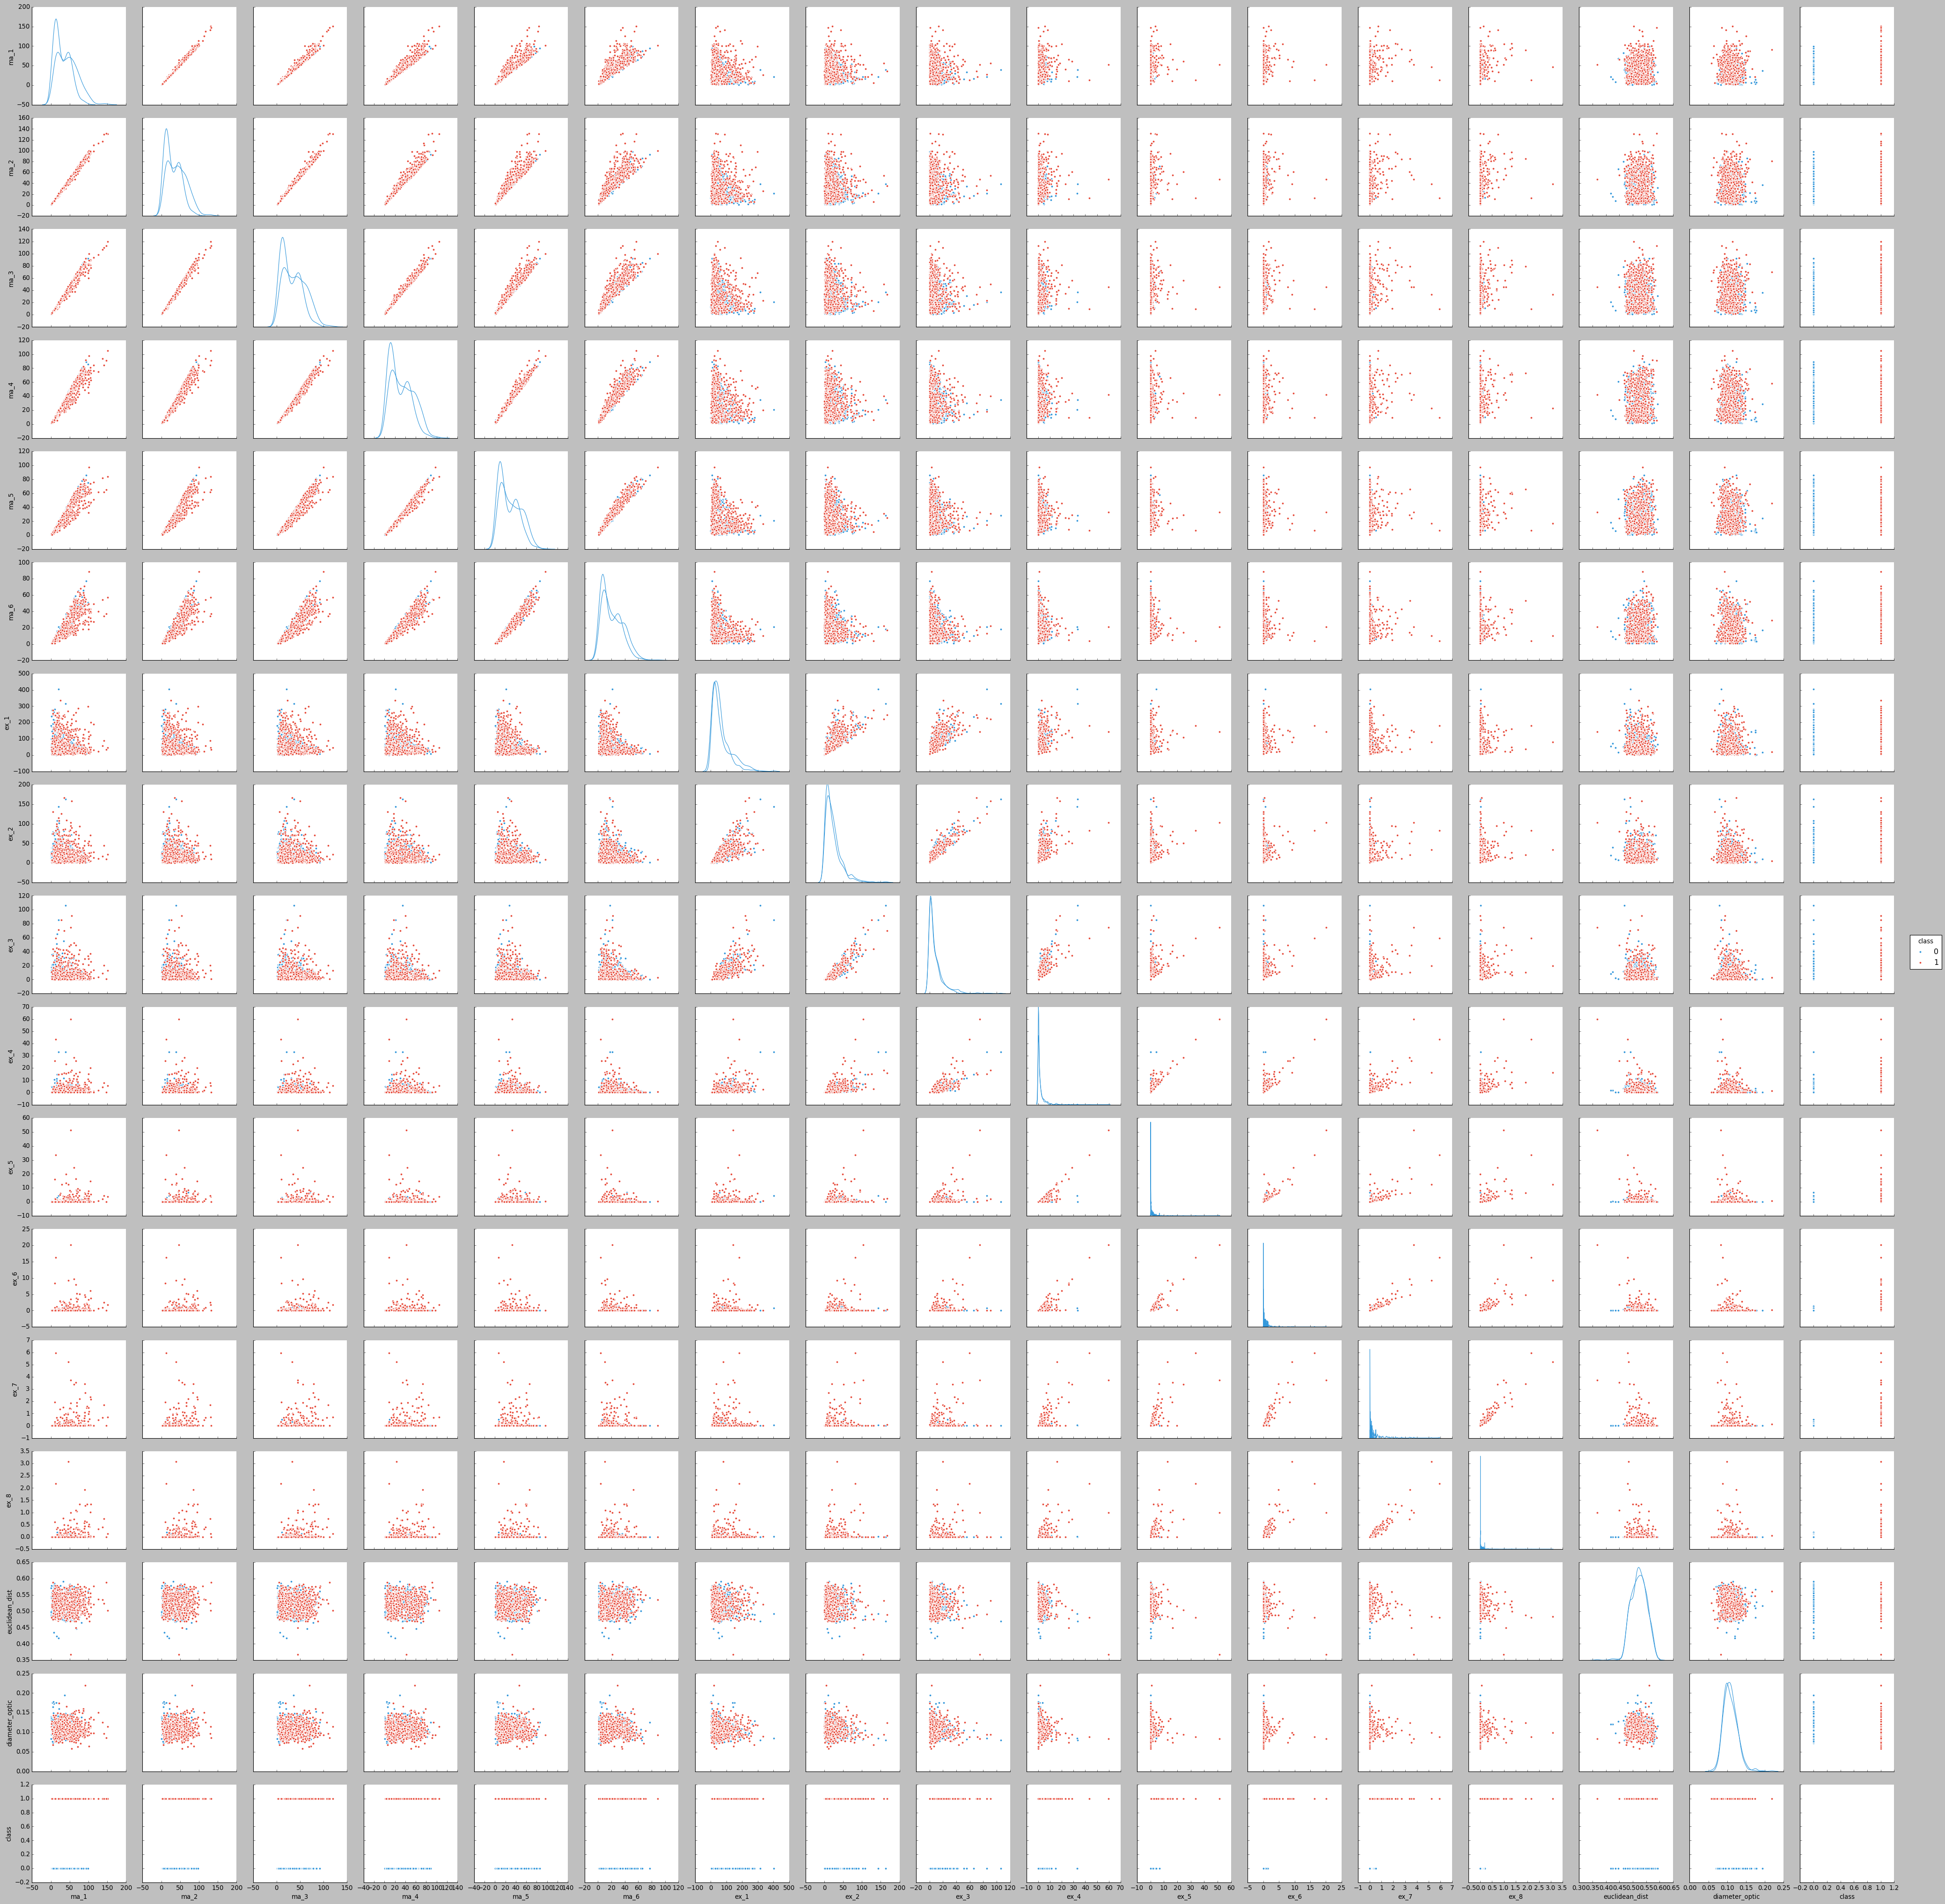

In [10]:
sns.pairplot(cont, hue='class', size=3, diag_kind="kde", palette={0: "#3498db", 1: "#e74c3c"},)

Drilling down on this plot shows little linear separation

ma_1                 AxesSubplot(0.125,0.664706;0.0945122x0.235294)
ma_2              AxesSubplot(0.238415,0.664706;0.0945122x0.235294)
ma_3              AxesSubplot(0.351829,0.664706;0.0945122x0.235294)
ma_4              AxesSubplot(0.465244,0.664706;0.0945122x0.235294)
ma_5              AxesSubplot(0.578659,0.664706;0.0945122x0.235294)
ma_6              AxesSubplot(0.692073,0.664706;0.0945122x0.235294)
ex_1              AxesSubplot(0.805488,0.664706;0.0945122x0.235294)
ex_2                 AxesSubplot(0.125,0.382353;0.0945122x0.235294)
ex_3              AxesSubplot(0.238415,0.382353;0.0945122x0.235294)
ex_4              AxesSubplot(0.351829,0.382353;0.0945122x0.235294)
ex_5              AxesSubplot(0.465244,0.382353;0.0945122x0.235294)
ex_6              AxesSubplot(0.578659,0.382353;0.0945122x0.235294)
ex_7              AxesSubplot(0.692073,0.382353;0.0945122x0.235294)
ex_8              AxesSubplot(0.805488,0.382353;0.0945122x0.235294)
euclidean_dist            AxesSubplot(0.125,0.1;

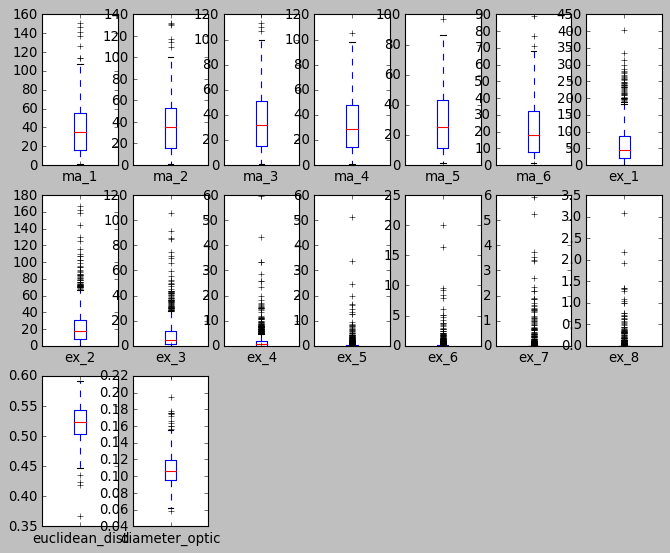

In [11]:
#box plots for continuous variables
cont.iloc[:,:-1].plot(kind= 'box' , subplots=True, layout=(3,7), sharex=False, sharey=False, figsize=(10,8))

Most apart from Euclidean distance (which has small outliers) have large outliers.<br>
May need some scaling

Text(0.5, 0.98, 'Correlation Heatmap')

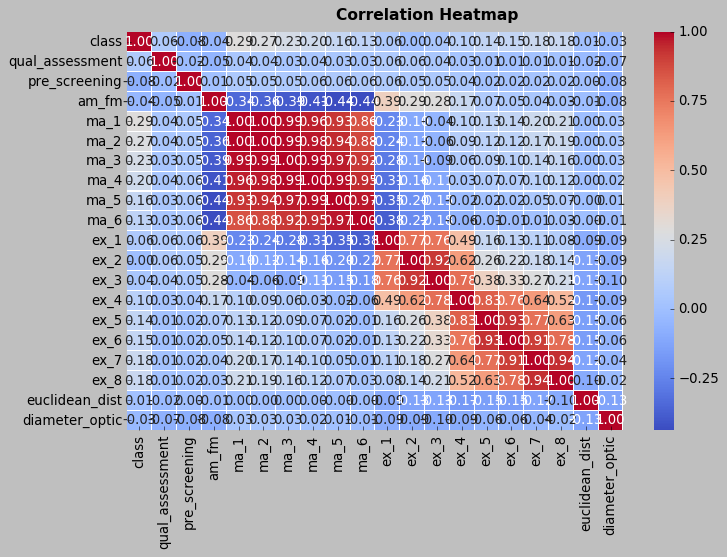

In [12]:
#create heat map for continuous attributes
corr = df.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

None correlate highly with class. May need combinations?<br>
ma variables are highly correlated.<br>
ex variables also correlated but less so (pattern between bottom half and top half) <br>
As the ma and ex variables are counts at different levels of confidence levels, do we need all of them?

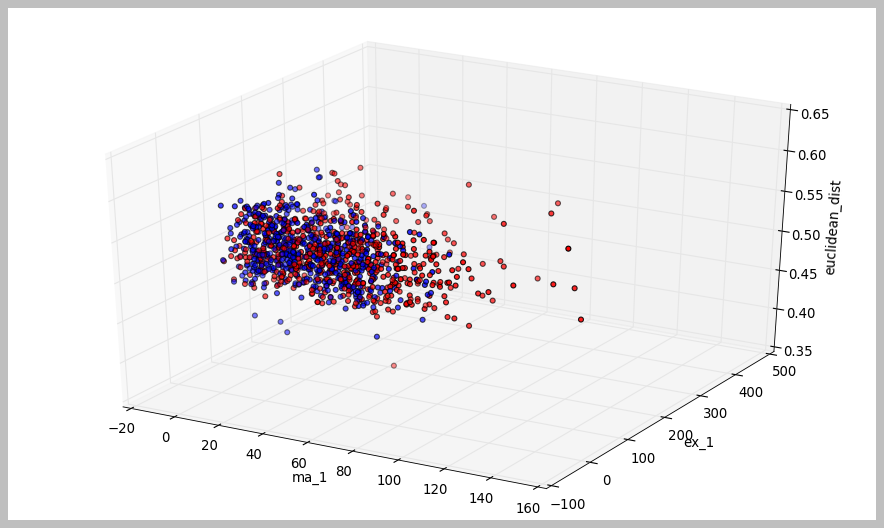

In [13]:
#lets try a 3D plot with low-correlated variables
#e.g. ma_1, ex_1 and euclidean_dist

feature1 = df['ma_1'].values
feature2 = df['ex_1'].values 
feature3 = df['euclidean_dist'].values

df['class']=df['class'].astype('str')

c = df['class'].values
df['class']=df['class'].astype('int')
c[c=='0'] = 'b' #benign
c[c=='1'] = 'r' #malignant

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('ma_1')
ax.set_ylabel('ex_1')
ax.set_zlabel('euclidean_dist')

plt.show()

Not much separation visible

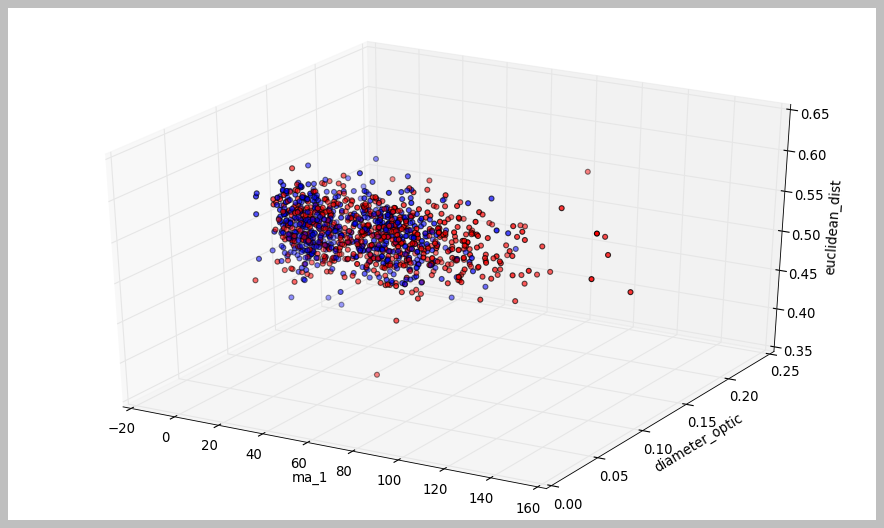

In [14]:
#try another 3D plot with low-correlated variables
#e.g. ma_1, diameter_optic and euclidean_dist

feature1 = df['ma_1'].values
feature2 = df['diameter_optic'].values 
feature3 = df['euclidean_dist'].values

df['class']=df['class'].astype('str')

c = df['class'].values
df['class']=df['class'].astype('int')
c[c=='0'] = 'b' #benign
c[c=='1'] = 'r' #malignant

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('ma_1')
ax.set_ylabel('diameter_optic')
ax.set_zlabel('euclidean_dist')

plt.show()

Again, not much separation visible in 3D

### Feature engineering

ma_1                 AxesSubplot(0.125,0.664706;0.0945122x0.235294)
ma_2              AxesSubplot(0.238415,0.664706;0.0945122x0.235294)
ma_3              AxesSubplot(0.351829,0.664706;0.0945122x0.235294)
ma_4              AxesSubplot(0.465244,0.664706;0.0945122x0.235294)
ma_5              AxesSubplot(0.578659,0.664706;0.0945122x0.235294)
ma_6              AxesSubplot(0.692073,0.664706;0.0945122x0.235294)
ex_1              AxesSubplot(0.805488,0.664706;0.0945122x0.235294)
ex_2                 AxesSubplot(0.125,0.382353;0.0945122x0.235294)
ex_3              AxesSubplot(0.238415,0.382353;0.0945122x0.235294)
ex_4              AxesSubplot(0.351829,0.382353;0.0945122x0.235294)
ex_5              AxesSubplot(0.465244,0.382353;0.0945122x0.235294)
ex_6              AxesSubplot(0.578659,0.382353;0.0945122x0.235294)
ex_7              AxesSubplot(0.692073,0.382353;0.0945122x0.235294)
ex_8              AxesSubplot(0.805488,0.382353;0.0945122x0.235294)
euclidean_dist            AxesSubplot(0.125,0.1;

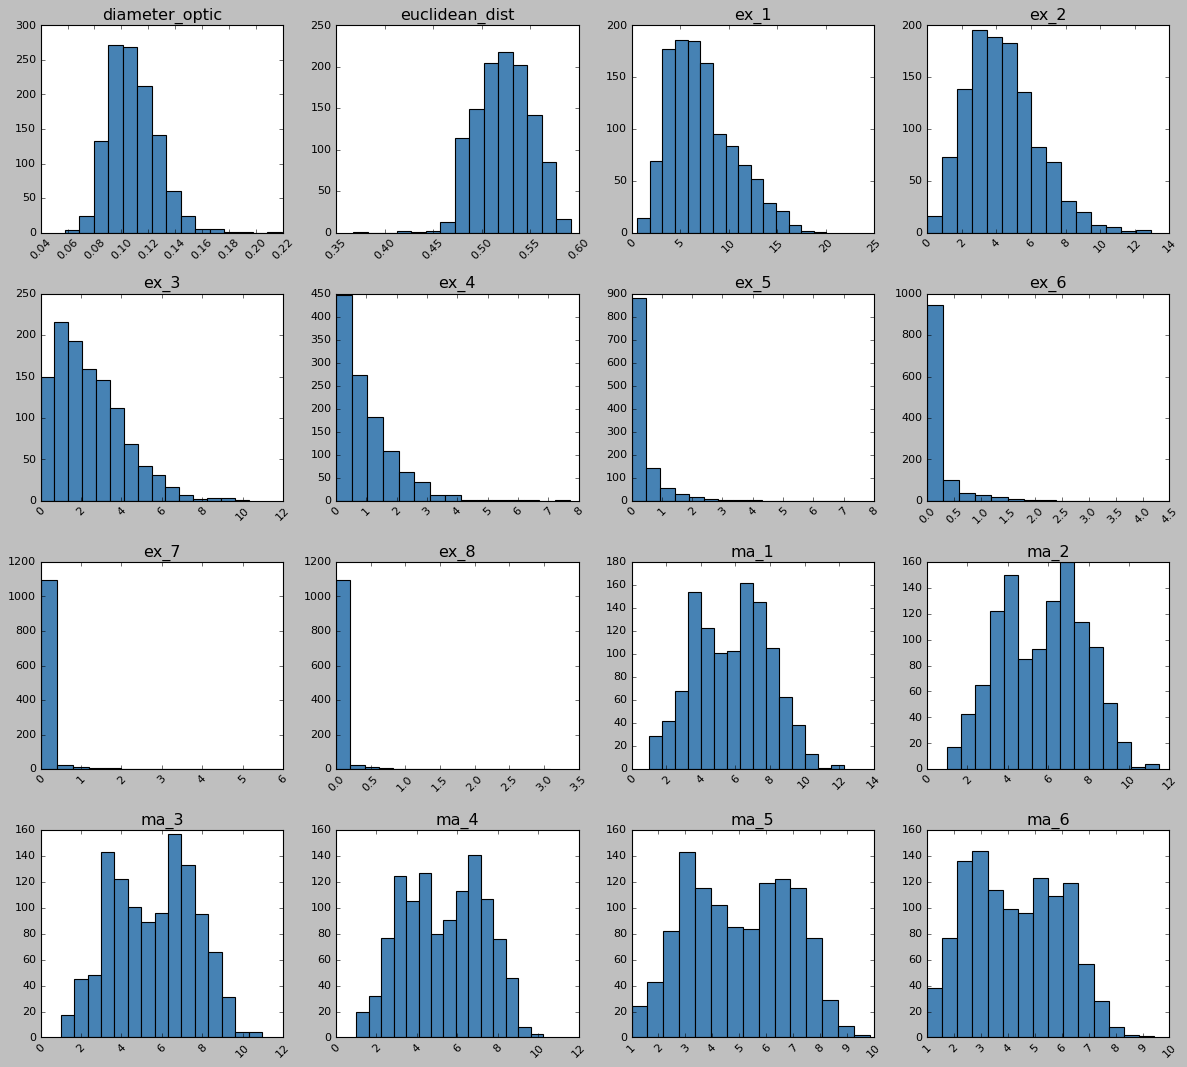

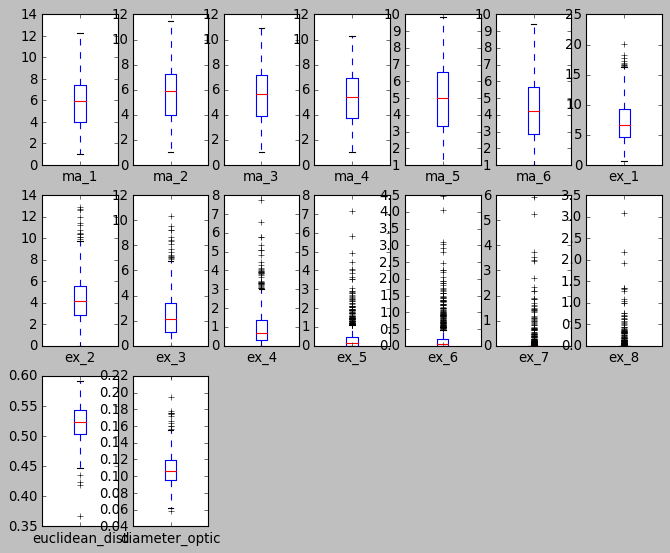

In [15]:
#noticed considerable skew for the count variables ma_* and ex_*
#these are characteristic of a Poisson distribution (count data) so apply some transformations
#to normalise them as much as possible

df_trans = df.copy()

ma_cols=["ma_1","ma_2","ma_3","ma_4","ma_5","ma_6"]
ex_cols=["ex_1","ex_2","ex_3","ex_4","ex_5","ex_6"]

df_trans[ma_cols] =  df_trans[ma_cols].apply(lambda x: np.sqrt(x))
df_trans[ex_cols] =  df_trans[ex_cols].apply(lambda x: np.sqrt(x))

df_trans.head()

cont_trans = df_trans[["ma_1",
        "ma_2",
        "ma_3",
        "ma_4",
        "ma_5",
        "ma_6",
        "ex_1",
        "ex_2",
        "ex_3",
        "ex_4",
        "ex_5",
        "ex_6",
        "ex_7",
        "ex_8",
        "euclidean_dist",
        "diameter_optic"]]

fig = cont_trans.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

cont_trans.plot(kind= 'box' , subplots=True, layout=(3,7), sharex=False, sharey=False, figsize=(10,8))
#examine2(df_trans)

Still many outliers especially for ex_4-ex_8

Although there was a section here where feature selection and extraction was done on the <bold>whole</bold> data set, 
it was realised that this would lead to "data leakage", whereby information from outside the set of data used for
training informs the nature of the model. Therefore all pre-processing, feature-selection and extraction is now done within pipelines, which ensures that the training and test data are kept separate.

### Modelling

In [16]:
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import feature_selection

In [17]:
#define some useful functions, assumes estimator has been fit

def roc_curve(estimator, X_te, y_te):
    fig = plt.figure(figsize=(6, 4))
    probs = estimator.predict_proba(X_te)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_te, preds, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(' AUC: ' + current_auc))
    plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')
    plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2, 
             linestyle=':', 
             color='black', 
             label='perfect performance')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operator Characteristic')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()
    
def confusion_matrix(estimator, X_te, y_te):
    temp = estimator.predict(X_te)
    confmat = metrics.confusion_matrix(y_true=y_te, y_pred=temp)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()
    
def scores(estimator, X_te, y_te):
    predicted = estimator.predict(X_te)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true=y_te, y_pred=predicted).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_te, predicted)))
    print('Precision: {:.2f}'.format(metrics.precision_score(y_te, predicted)))
    print('Specificity: {:.2f}'.format(specificity))
    print('Sensitivity (recall): {:.2f}'.format(metrics.recall_score(y_te, predicted)))
    print('F1: {:.2f}'.format(metrics.f1_score(y_te, predicted)))
    
def best_params(estimator):
    print(estimator.best_params_)
    

In [18]:
#Create some custom scalers that ignore binary variables - only scales continuous variables provided in array
#Code adapted from stackoverflow website

class CustomStandardScaler(BaseEstimator,TransformerMixin): 
    # note: returns the feature matrix with the binary columns ordered first  
    def __init__(self,bin_vars_index, cont_vars_index):
        self.scaler = StandardScaler()
        self.bin_vars_index = bin_vars_index
        self.cont_vars_index = cont_vars_index

    def fit(self, X, y=None):
        self.scaler.fit(X[:,self.cont_vars_index], y)
        return self

    def transform(self, X, y=None, copy=None):
        X_tail = self.scaler.transform(X[:,self.cont_vars_index],y,copy)
        return np.concatenate((X[:,self.bin_vars_index],X_tail), axis=1)

class CustomRobustScaler(BaseEstimator,TransformerMixin): 
    # note: returns the feature matrix with the binary columns ordered first  
    def __init__(self, bin_vars_index, cont_vars_index):
        self.scaler = RobustScaler()
        self.bin_vars_index = bin_vars_index
        self.cont_vars_index = cont_vars_index

    def fit(self, X, y=None):
        self.scaler.fit(X[:,self.cont_vars_index], y)
        return self

    def transform(self, X, y=None, copy=None):
        X_tail = self.scaler.transform(X[:,self.cont_vars_index])
        return np.concatenate((X[:,self.bin_vars_index],X_tail), axis=1)
    
#only scales continuous variables provided in array   
class CustomMinMaxScaler(BaseEstimator,TransformerMixin): 
    # note: returns the feature matrix with the binary columns ordered first  
    def __init__(self, bin_vars_index, cont_vars_index):
        self.scaler = MinMaxScaler()
        self.bin_vars_index = bin_vars_index
        self.cont_vars_index = cont_vars_index

    def fit(self, X, y=None):
        self.scaler.fit(X[:,self.cont_vars_index], y)
        return self

    def transform(self, X, y=None, copy=None):
        X_tail = self.scaler.transform(X[:,self.cont_vars_index])
        return np.concatenate((X[:,self.bin_vars_index],X_tail), axis=1)

In [19]:
#common to all models

#split data into training and test datasets 

X, y = df_trans.iloc[:,1:].values, df_trans.iloc[:,0].values #label is first column 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#specify which of non-label variables are binary and which are continuous
#so we can avoid scaling binary variables

bin_vars = np.array([0,1,2])
cont_vars = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [20]:
#Dummy classifier

pipe_dummy = make_pipeline(DummyClassifier(strategy="most_frequent"))                           
pipe_dummy.fit(X_train, y_train)
print("Test set score: {:.2f}".format(pipe_dummy.score(X_test, y_test)))

Test set score: 0.55


#### 1a. KNN models - no scalar

In [21]:
#1. knn: data not scaled (all features)
#2. knn: data not scaled (Random Forest selected features)
#3. knn: data not scaled (RFE (Recursive Feature Elimation) selected features)
#4. knn: data not scaled (PCA extracted features)

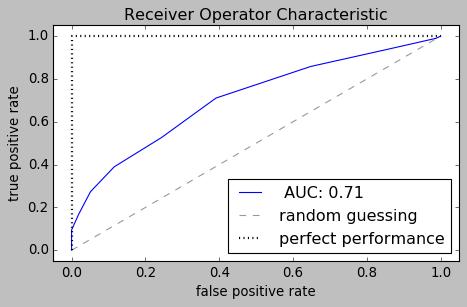

Accuracy: 0.63
Precision: 0.72
Specificity: 0.76
Sensitivity (recall): 0.53
F1: 0.61


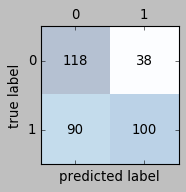

In [22]:
#1. knn: data not scaled (all features)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_all_ = make_pipeline(KNeighborsClassifier())

grid_knn_all_ = GridSearchCV(pipe_knn_all_, param_grid, cv=5, scoring='roc_auc')
grid_knn_all_.fit(X_train, y_train)

#eval
roc_curve(grid_knn_all_, X_test, y_test)
scores(grid_knn_all_, X_test, y_test)
confusion_matrix(grid_knn_all_, X_test, y_test)

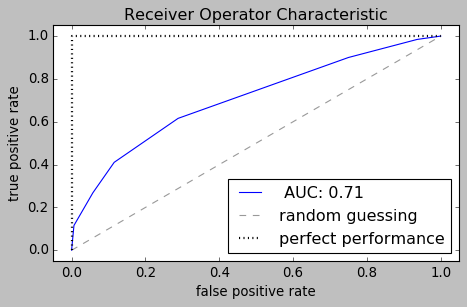

Accuracy: 0.66
Precision: 0.72
Specificity: 0.71
Sensitivity (recall): 0.62
F1: 0.66


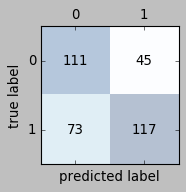

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [23]:
#2. knn: data not scaled (Random Forest selected  features)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }

pipe_knn_rf_ = make_pipeline(
                            SelectFromModel(rfc),
                            KNeighborsClassifier())

grid_knn_rf_ = GridSearchCV(pipe_knn_rf_, param_grid, cv=5, scoring='roc_auc')
grid_knn_rf_.fit(X_train, y_train)


#eval
roc_curve(grid_knn_rf_, X_test, y_test)
scores(grid_knn_rf_, X_test, y_test)
confusion_matrix(grid_knn_rf_, X_test, y_test)

#get columns selected by random Forest
fs = grid_knn_rf_.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

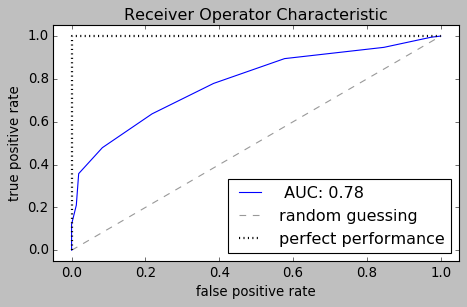

Accuracy: 0.70
Precision: 0.78
Specificity: 0.78
Sensitivity (recall): 0.64
F1: 0.70


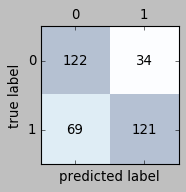

Index(['pre_screening', 'ma_1', 'ma_3', 'ma_4', 'ex_7'], dtype='object')


In [24]:
#3. knn: data not scaled (RFE selected features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_RFE_ = make_pipeline(
                             f5,
                             KNeighborsClassifier())

grid_knn_RFE_ = GridSearchCV(pipe_knn_RFE_, param_grid, cv=5, scoring='roc_auc')
grid_knn_RFE_.fit(X_train, y_train)

#eval
roc_curve(grid_knn_RFE_, X_test, y_test)
scores(grid_knn_RFE_, X_test, y_test)
confusion_matrix(grid_knn_RFE_, X_test, y_test)
                 
#get columns selected by RFE
fs = grid_knn_RFE_.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)

In [25]:
best_params(grid_knn_RFE_)

{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 9}


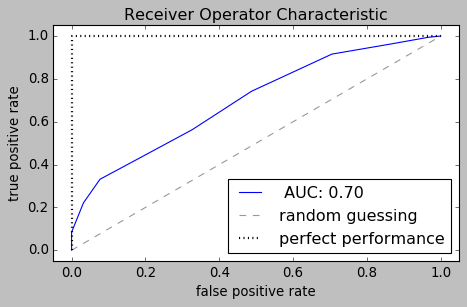

Accuracy: 0.61
Precision: 0.68
Specificity: 0.67
Sensitivity (recall): 0.56
F1: 0.61


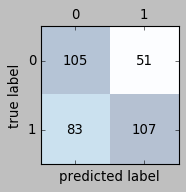

In [26]:
#4. knn: data not scaled with PCA 
warnings.filterwarnings('ignore')

param_grid ={'pca__n_components': [2,3,4,5,6,7,8,9,10],
             'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_pca_ = make_pipeline(
                             PCA(),        
                             KNeighborsClassifier())

grid_knn_pca_ = GridSearchCV(pipe_knn_pca_, param_grid, cv=5, scoring='roc_auc')
grid_knn_pca_.fit(X_train, y_train)

#eval
roc_curve(grid_knn_pca_, X_test, y_test)
scores(grid_knn_pca_, X_test, y_test)
confusion_matrix(grid_knn_pca_, X_test, y_test)



***results***
pipe_dummy: 0.522982 (0.001525)
grid_knn_all: 0.717985 (0.038463)
grid_knn_rf: 0.716345 (0.043392)
grid_knn_RFE: 0.743311 (0.032808)
grid_knn_pca: 0.710690 (0.032926)

-> 5 -Fold cross-validation accuracy score for the training data for 5 classifiers


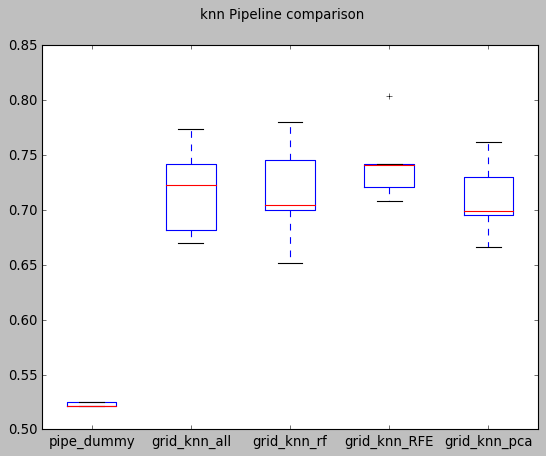

In [27]:
#compare all models by boxplot - this takes a while
warnings.filterwarnings('ignore')

results = []
names = []
msg =str()
num_folds=5

estimators = [('pipe_dummy', pipe_dummy),
              ('grid_knn_all', grid_knn_all_),
              ('grid_knn_rf', grid_knn_rf_),
              ('grid_knn_RFE', grid_knn_RFE_),
              ('grid_knn_pca', grid_knn_pca_)]

for name, est in estimators:

    cv_results = cross_val_score(est, X_train, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
print ('\n\n***results***')
print (msg)
print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'knn Pipeline comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_autoscaley_on(True)
plt.show()

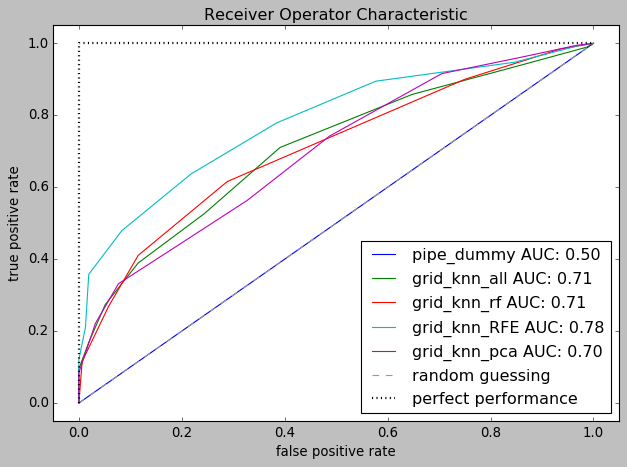

In [28]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_knn_all', grid_knn_all_),
              ('grid_knn_rf', grid_knn_rf_),
              ('grid_knn_RFE', grid_knn_RFE_),
              ('grid_knn_pca', grid_knn_pca_)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 1b. kNN model - with Scaler

In [29]:
#1. knn: data scaled (all features)
#2. knn: data scaled (Random Forest selected features)
#3. knn: data scaled (RFE (Recursive Feature Elimation) selected features)
#4. knn: data scaled (PCA extracted features)

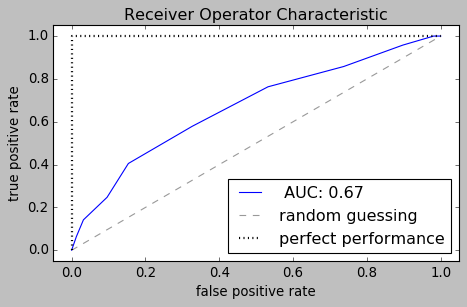

Accuracy: 0.62
Precision: 0.68
Specificity: 0.67
Sensitivity (recall): 0.58
F1: 0.63


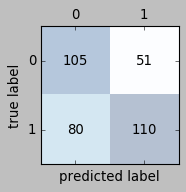

In [30]:
#1. knn: data scaled (all features)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_all = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             KNeighborsClassifier())

grid_knn_all = GridSearchCV(pipe_knn_all, param_grid, cv=5, scoring='roc_auc')
grid_knn_all.fit(X_train, y_train)

#eval
roc_curve(grid_knn_all, X_test, y_test)
scores(grid_knn_all, X_test, y_test)
confusion_matrix(grid_knn_all, X_test, y_test)

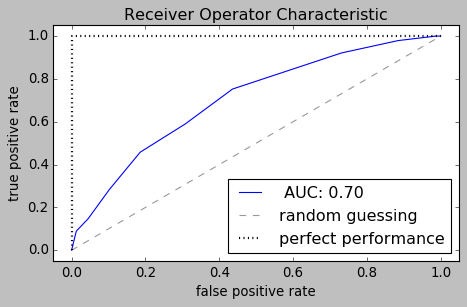

Accuracy: 0.64
Precision: 0.70
Specificity: 0.69
Sensitivity (recall): 0.59
F1: 0.64


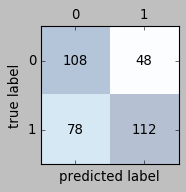

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [31]:
#2. knn: data scaled (Random Forest selected  features)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }

pipe_knn_rf = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                            SelectFromModel(rfc),
                            KNeighborsClassifier())

grid_knn_rf = GridSearchCV(pipe_knn_rf, param_grid, cv=5, scoring='roc_auc')
grid_knn_rf.fit(X_train, y_train)


#eval
roc_curve(grid_knn_rf, X_test, y_test)
scores(grid_knn_rf, X_test, y_test)
confusion_matrix(grid_knn_rf, X_test, y_test)

#get columns selected by random Forest
fs = grid_knn_rf.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

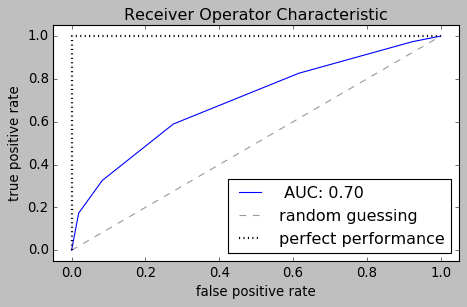

Accuracy: 0.65
Precision: 0.72
Specificity: 0.72
Sensitivity (recall): 0.59
F1: 0.65


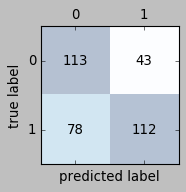

Index(['ma_1', 'ma_2', 'ma_4', 'ma_5', 'ma_6'], dtype='object')


In [32]:
#3. knn: data scaled (RFE selected features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_RFE = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             f5,
                             KNeighborsClassifier())

grid_knn_RFE = GridSearchCV(pipe_knn_RFE, param_grid, cv=5, scoring='roc_auc')
grid_knn_RFE.fit(X_train, y_train)

#eval
roc_curve(grid_knn_RFE, X_test, y_test)
scores(grid_knn_RFE, X_test, y_test)
confusion_matrix(grid_knn_RFE, X_test, y_test)
                 
#get columns selected by RFE
fs = grid_knn_RFE.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)

In [33]:
best_params(grid_knn_RFE)

{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 5}


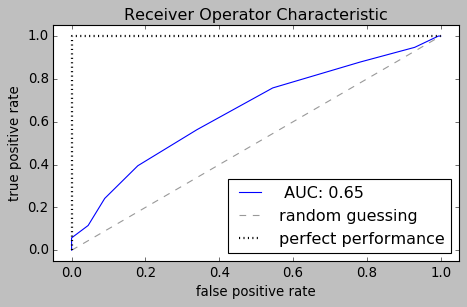

Accuracy: 0.61
Precision: 0.67
Specificity: 0.66
Sensitivity (recall): 0.56
F1: 0.61


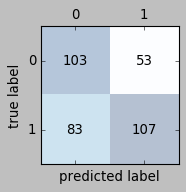

In [34]:
#4. knn: data scaled with PCA 
warnings.filterwarnings('ignore')

param_grid ={'pca__n_components': [2,3,4,5,6,7,8,9,10],
             'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
             'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
            }
pipe_knn_pca = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             PCA(),        
                             KNeighborsClassifier())

grid_knn_pca = GridSearchCV(pipe_knn_pca, param_grid, cv=5, scoring='roc_auc')
grid_knn_pca.fit(X_train, y_train)

#eval
roc_curve(grid_knn_pca, X_test, y_test)
scores(grid_knn_pca, X_test, y_test)
confusion_matrix(grid_knn_pca, X_test, y_test)



***results***
pipe_dummy: 0.522982 (0.001525)
grid_knn_all: 0.678768 (0.039553)
grid_knn_rf: 0.681885 (0.031924)
grid_knn_RFE: 0.714854 (0.040356)
grid_knn_pca: 0.682316 (0.053848)

-> 5 -Fold cross-validation accuracy score for the training data for 5 classifiers


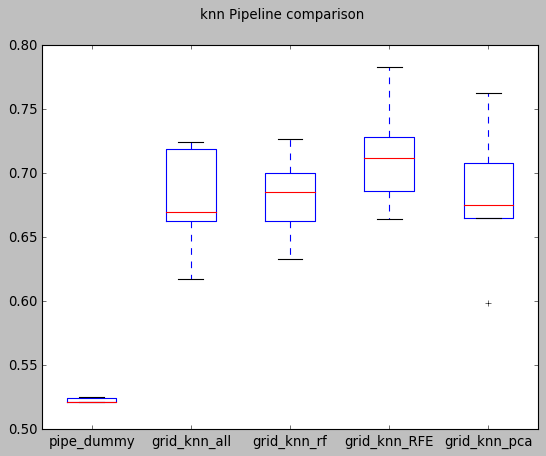

In [35]:
#compare all models by boxplot - this takes a while
warnings.filterwarnings('ignore')

results = []
names = []
msg =str()
num_folds=5

estimators = [('pipe_dummy', pipe_dummy),
              ('grid_knn_all', grid_knn_all),
              ('grid_knn_rf', grid_knn_rf),
              ('grid_knn_RFE', grid_knn_RFE),
              ('grid_knn_pca', grid_knn_pca)]

for name, est in estimators:

    cv_results = cross_val_score(est, X_train, y_train, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
print ('\n\n***results***')
print (msg)
print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'knn Pipeline comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_autoscaley_on(True)
plt.show()


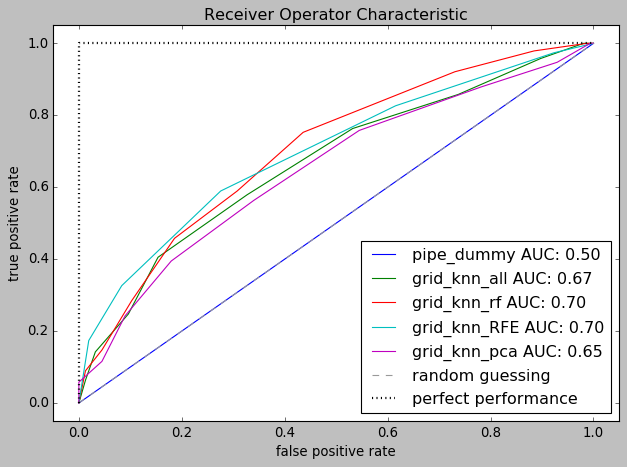

In [36]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_knn_all', grid_knn_all),
              ('grid_knn_rf', grid_knn_rf),
              ('grid_knn_RFE', grid_knn_RFE),
              ('grid_knn_pca', grid_knn_pca)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 2a. SVM model (kernel: RBF) - no scaler

In [37]:
#1. SVM: data not scaled (all features)
#2. SVM: data not scaled (Random Forest selected features)
#3. SVM: data not scaled (RFE (Recursive Feature Elimation) selected features)
#4. SVM: data not scaled (PCA extracted features)

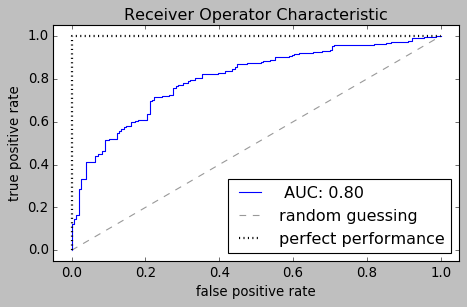

Accuracy: 0.71
Precision: 0.81
Specificity: 0.82
Sensitivity (recall): 0.61
F1: 0.69


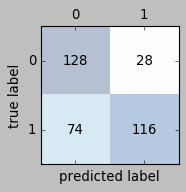

In [38]:
#1. SVM: data not scaled (all features)
                
param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_all_ = make_pipeline(
                                SVC(kernel='rbf', probability=True))

grid_svm_r_all_ = GridSearchCV(pipe_svm_r_all_, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_all_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_all_, X_test, y_test)
scores(grid_svm_r_all_, X_test, y_test)
confusion_matrix(grid_svm_r_all_, X_test, y_test)

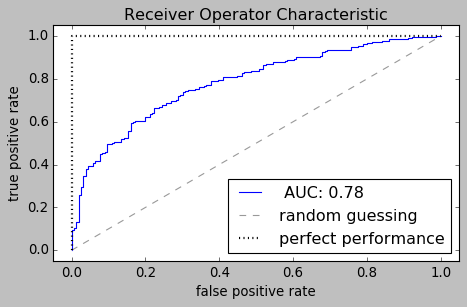

Accuracy: 0.70
Precision: 0.80
Specificity: 0.82
Sensitivity (recall): 0.61
F1: 0.69


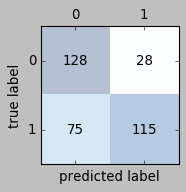

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [39]:
#2 SVM SVM: data not scaled (RF selected  features)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_rf_ = make_pipeline(
                            SelectFromModel(rfc),
                            SVC(kernel='rbf', probability=True))

grid_svm_r_rf_ = GridSearchCV(pipe_svm_r_rf_, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_rf_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_rf_, X_test, y_test)
scores(grid_svm_r_rf_, X_test, y_test)
confusion_matrix(grid_svm_r_rf_, X_test, y_test)

#get columns selected by random Forest
fs = grid_svm_r_rf_.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

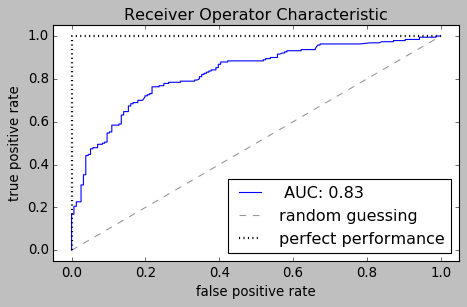

Accuracy: 0.72
Precision: 0.85
Specificity: 0.88
Sensitivity (recall): 0.58
F1: 0.69


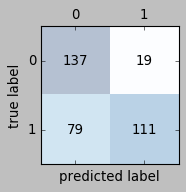

Index(['pre_screening', 'ma_1', 'ma_3', 'ma_4', 'ex_7'], dtype='object')


In [40]:
#3. SVM: data not scaled (LR selected  features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_RFE_ = make_pipeline(
                             f5,
                             SVC(kernel='rbf', probability=True))

grid_svm_r_RFE_ = GridSearchCV(pipe_svm_r_RFE_, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_RFE_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_RFE_, X_test, y_test)
scores(grid_svm_r_RFE_, X_test, y_test)
confusion_matrix(grid_svm_r_RFE_, X_test, y_test)

#get columns selected by RFE
fs = grid_svm_r_RFE_.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)

In [41]:
best_params(grid_svm_r_RFE_)

{'svc__C': 10, 'svc__gamma': 0.01}


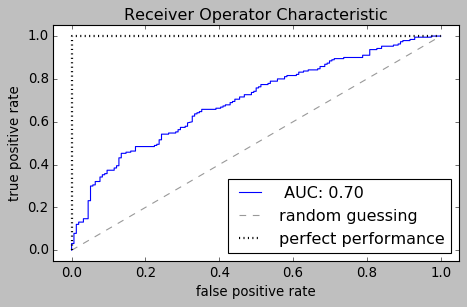

Accuracy: 0.55
Precision: 0.55
Specificity: 0.00
Sensitivity (recall): 1.00
F1: 0.71


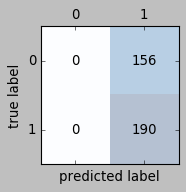

In [42]:
#4. SVM: data not scaled with PCA 
warnings.filterwarnings('ignore')

param_grid ={'pca__n_components':[3,4,5,6,7,8],
             'svc__C': [0.001, 0.01,],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_pca_ = make_pipeline(
                             PCA(),
                             SVC(kernel='rbf', probability=True))

grid_svm_r_pca_ = GridSearchCV(pipe_svm_r_pca_, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_pca_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_pca_, X_test, y_test)
scores(grid_svm_r_pca_, X_test, y_test)
confusion_matrix(grid_svm_r_pca_, X_test, y_test)



***results***
pipe_dummy: 0.500000 (0.000000)
grid_svm_r_all: 0.827266 (0.042850)
grid_svm_r_rf: 0.815956 (0.034718)
grid_svm_r_RFE: 0.813475 (0.028956)
grid_svm_r_pca: 0.714300 (0.043151)

-> 5 -Fold cross-validation accuracy score for the training data for 5 classifiers


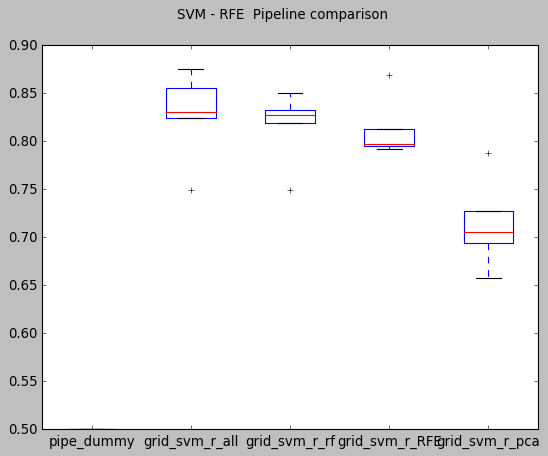

In [43]:
#compare all models by boxplot - this takes a while
warnings.filterwarnings('ignore')

results = []
names = []
msg =str()
num_folds=5

estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_r_all', grid_svm_r_all_),
              ('grid_svm_r_rf', grid_svm_r_rf_),
              ('grid_svm_r_RFE', grid_svm_r_RFE_),
              ('grid_svm_r_pca', grid_svm_r_pca_)]

for name, est in estimators:

    cv_results = cross_val_score(est, X_train, y_train, cv=num_folds, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
print ('\n\n***results***')
print (msg)
print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'SVM - RFE  Pipeline comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_autoscaley_on(True)
plt.show()


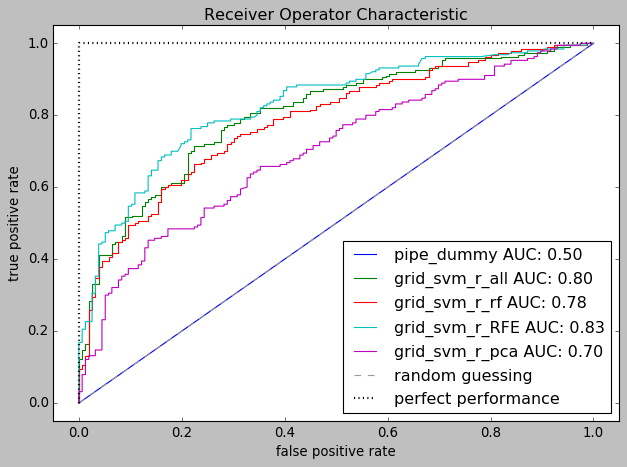

In [44]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_r_all', grid_svm_r_all_),
              ('grid_svm_r_rf', grid_svm_r_rf_),
              ('grid_svm_r_RFE', grid_svm_r_RFE_),
              ('grid_svm_r_pca', grid_svm_r_pca_)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 2b. SVM model (kernel: RBF) - with Scaler

In [45]:
#1. SVM: data scaled (all features)
#2. SVM: data scaled (Random Forest selected features)
#3. SVM: data scaled (RFE (Recursive Feature Elimation) selected features)
#4. SVM: data scaled (PCA extracted features)

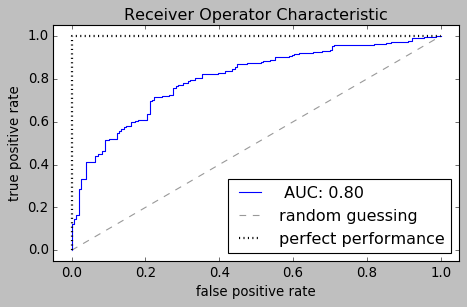

Accuracy: 0.71
Precision: 0.81
Specificity: 0.82
Sensitivity (recall): 0.61
F1: 0.69


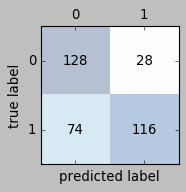

In [46]:
#1. SVM: data scaled (all features)
                
param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_all = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                                SVC(kernel='rbf', probability=True))

grid_svm_r_all = GridSearchCV(pipe_svm_r_all_, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_all.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_all, X_test, y_test)
scores(grid_svm_r_all, X_test, y_test)
confusion_matrix(grid_svm_r_all, X_test, y_test)

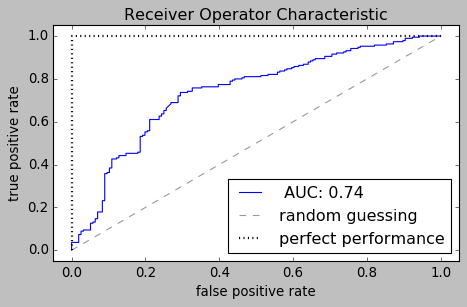

Accuracy: 0.68
Precision: 0.76
Specificity: 0.76
Sensitivity (recall): 0.62
F1: 0.68


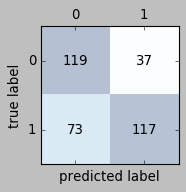

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [47]:
#2 SVM: data scaled (RF selected  features)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_rf = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                            SelectFromModel(rfc),
                            SVC(kernel='rbf', probability=True))

grid_svm_r_rf= GridSearchCV(pipe_svm_r_rf, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_rf.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_rf, X_test, y_test)
scores(grid_svm_r_rf, X_test, y_test)
confusion_matrix(grid_svm_r_rf, X_test, y_test)

#get columns selected by random Forest
fs = grid_svm_r_rf.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

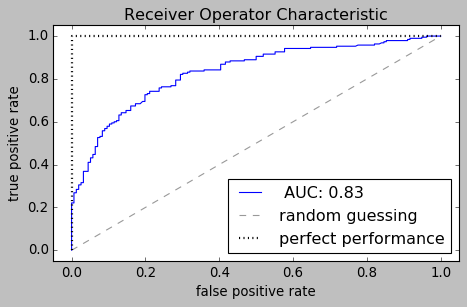

Accuracy: 0.74
Precision: 0.85
Specificity: 0.86
Sensitivity (recall): 0.64
F1: 0.73


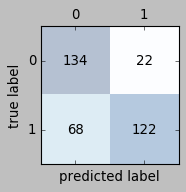

Index(['ma_1', 'ma_2', 'ma_4', 'ma_5', 'ma_6'], dtype='object')


In [48]:
#3. SVM: data scaled (LR selected  features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_RFE = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             f5,
                             SVC(kernel='rbf', probability=True))

grid_svm_r_RFE = GridSearchCV(pipe_svm_r_RFE, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_RFE.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_RFE, X_test, y_test)
scores(grid_svm_r_RFE, X_test, y_test)
confusion_matrix(grid_svm_r_RFE, X_test, y_test)

#get columns selected by RFE
fs = grid_svm_r_RFE.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)

In [49]:
best_params(grid_svm_r_RFE)

{'svc__C': 10, 'svc__gamma': 1}


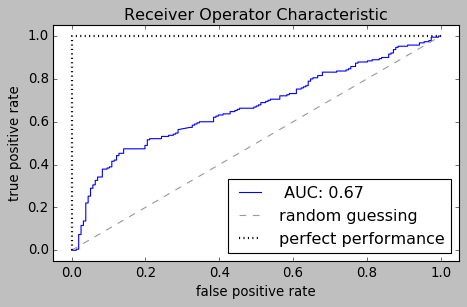

Accuracy: 0.55
Precision: 0.55
Specificity: 0.00
Sensitivity (recall): 1.00
F1: 0.71


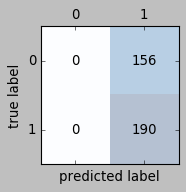

In [50]:
#4. SVM: data transformed and scaled with PCA 
warnings.filterwarnings('ignore')

param_grid ={'pca__n_components':[3,4,5,6,7,8],
             'svc__C': [0.001, 0.01,],
             'svc__gamma': [0.001, 0.01, 0.1, 1]}

pipe_svm_r_pca = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             PCA(),
                             SVC(kernel='rbf', probability=True))

grid_svm_r_pca = GridSearchCV(pipe_svm_r_pca, param_grid, cv=5, scoring='roc_auc')
grid_svm_r_pca.fit(X_train, y_train)

#eval
roc_curve(grid_svm_r_pca, X_test, y_test)
scores(grid_svm_r_pca, X_test, y_test)
confusion_matrix(grid_svm_r_pca, X_test, y_test)



***results***
pipe_dummy: 0.500000 (0.000000)
grid_svm_r_all: 0.827266 (0.042850)
grid_svm_r_rf: 0.774997 (0.042257)
grid_svm_r_RFE: 0.791166 (0.036858)
grid_svm_r_pca: 0.652802 (0.045749)

-> 5 -Fold cross-validation accuracy score for the training data for 5 classifiers


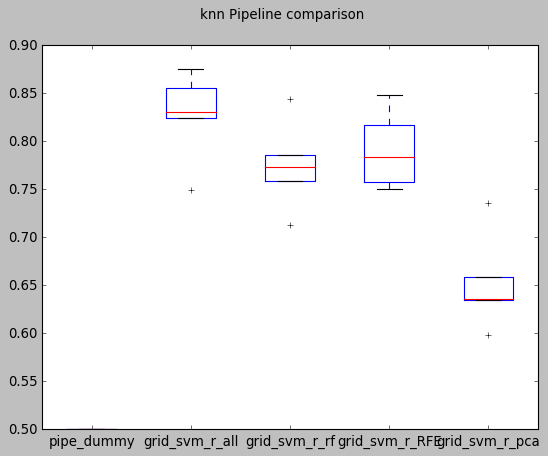

In [51]:
#compare all models by boxplot - this takes a while
warnings.filterwarnings('ignore')

results = []
names = []
msg =str()
num_folds=5

estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_r_all', grid_svm_r_all),
              ('grid_svm_r_rf', grid_svm_r_rf),
              ('grid_svm_r_RFE', grid_svm_r_RFE),
              ('grid_svm_r_pca', grid_svm_r_pca)]

for name, est in estimators:

    cv_results = cross_val_score(est, X_train, y_train, cv=num_folds, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
print ('\n\n***results***')
print (msg)
print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'knn Pipeline comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_autoscaley_on(True)
plt.show()


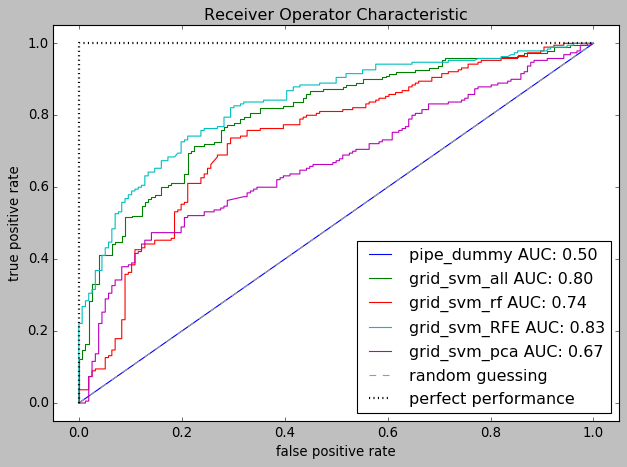

In [52]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_all', grid_svm_r_all),
              ('grid_svm_rf', grid_svm_r_rf),
              ('grid_svm_RFE', grid_svm_r_RFE),
              ('grid_svm_pca', grid_svm_r_pca)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 3a. SVM model (kernel: Polynomial) - no Scaler

In [53]:
#1. SVM: data not scaled (all features)
#2. SVM: data not scaled (Random Forest selected features)
#3. SVM: data not scaled (RFE (Recursive Feature Elimation) selected features)
#4. SVM: data not scaled (PCA extracted features)

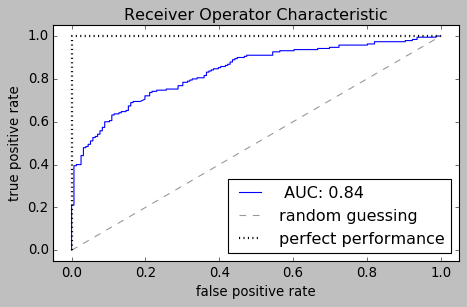

Accuracy: 0.75
Precision: 0.82
Specificity: 0.81
Sensitivity (recall): 0.70
F1: 0.75


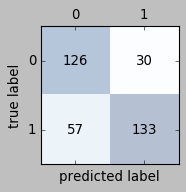

In [54]:
#1. SVM: data not scaled (all features)
                
param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_all_ = make_pipeline(
                             SVC(kernel='poly', probability=True))

grid_svm_all_ = GridSearchCV(pipe_svm_all_, param_grid, cv=5, scoring='roc_auc')
grid_svm_all_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_all_, X_test, y_test)
scores(grid_svm_all_, X_test, y_test)
confusion_matrix(grid_svm_all_, X_test, y_test)

In [72]:
best_params(grid_svm_all_)

{'svc__C': 10, 'svc__degree': 2}


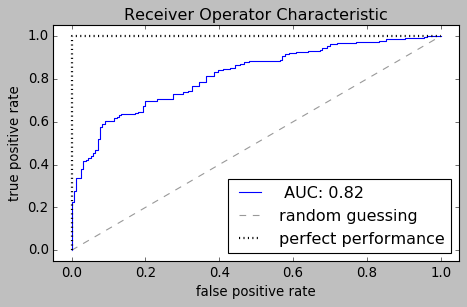

Accuracy: 0.72
Precision: 0.81
Specificity: 0.81
Sensitivity (recall): 0.65
F1: 0.72


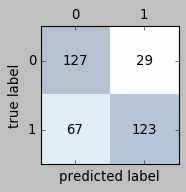

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [55]:
#2. SVM: data not scaled (RF selected  features)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_rf_ = make_pipeline(
                            SelectFromModel(rfc),
                            SVC(kernel='poly', probability=True))

grid_svm_rf_ = GridSearchCV(pipe_svm_rf_, param_grid, cv=5, scoring='roc_auc')
grid_svm_rf_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_rf_, X_test, y_test)
scores(grid_svm_rf_, X_test, y_test)
confusion_matrix(grid_svm_rf_, X_test, y_test)

#get columns selected by random Forest
fs = grid_svm_rf_.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

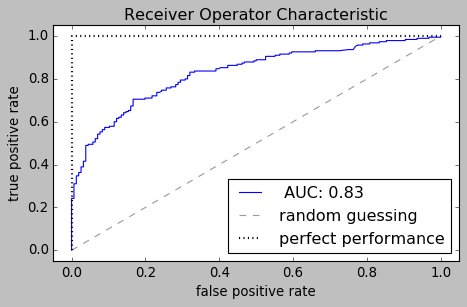

Accuracy: 0.73
Precision: 0.85
Specificity: 0.86
Sensitivity (recall): 0.63
F1: 0.72


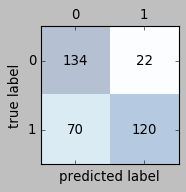

Index(['pre_screening', 'ma_1', 'ma_3', 'ma_4', 'ex_7'], dtype='object')


In [57]:
#3. SVM: data not scaled (LR selected  features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_RFE_ = make_pipeline(
                             f5,
                             SVC(kernel='poly', probability=True))

grid_svm_RFE_ = GridSearchCV(pipe_svm_RFE_, param_grid, cv=5, scoring='roc_auc')
grid_svm_RFE_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_RFE_, X_test, y_test)
scores(grid_svm_RFE_, X_test, y_test)
confusion_matrix(grid_svm_RFE_, X_test, y_test)

#get columns selected by RFE
fs = grid_svm_RFE_.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)

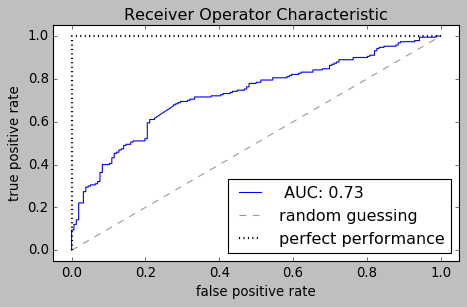

Accuracy: 0.65
Precision: 0.79
Specificity: 0.83
Sensitivity (recall): 0.51
F1: 0.62


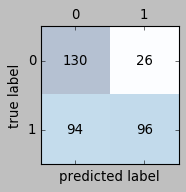

In [58]:
#4. SVM: data not scaled (PCA selected features)
warnings.filterwarnings('ignore')

param_grid ={'svc__C': [0.001, 0.01, 0.1],
             'svc__degree': [2,3]}

pipe_svm_pca_ = make_pipeline(
                             PCA(n_components=9),
                             SVC(kernel='poly', probability=True))

grid_svm_pca_ = GridSearchCV(pipe_svm_pca_, param_grid, cv=5, scoring='roc_auc')
grid_svm_pca_.fit(X_train, y_train)

#eval
roc_curve(grid_svm_pca_, X_test, y_test)
scores(grid_svm_pca_, X_test, y_test)
confusion_matrix(grid_svm_pca_, X_test, y_test)

In [59]:
#compare all models by boxplot - this takes a while
# warnings.filterwarnings('ignore')

# results = []
# names = []
# msg =str()
# num_folds=5

# estimators = [('pipe_dummy', pipe_dummy),
#               ('grid_knn_all', grid_svm_all_),
#               ('grid_knn_rf', grid_svm_rf_),
#               ('grid_knn_RFE', grid_svm_RFE_),
#               ('grid_knn_pca', grid_svm_pca_)]

# for name, est in estimators:

#     cv_results = cross_val_score(est, X_train, y_train, cv=num_folds)
#     results.append(cv_results)
#     names.append(name)
#     msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
# print ('\n\n***results***')
# print (msg)
# print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle( 'SVM Polynomial No Scalar Pipeline comparison' )
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# ax.set_autoscaley_on(True)
# plt.show()


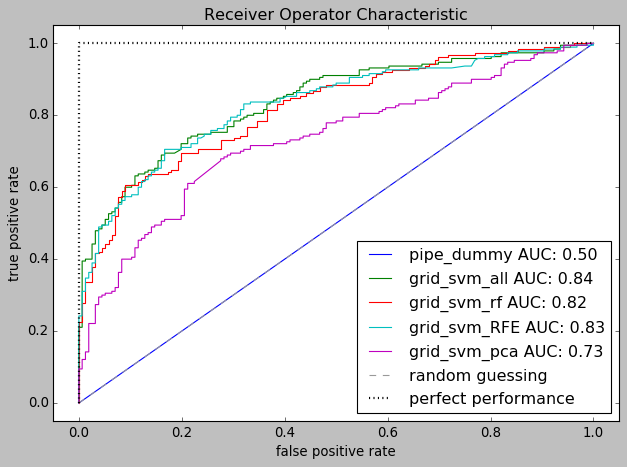

In [60]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_all', grid_svm_all_),
              ('grid_svm_rf', grid_svm_rf_),
              ('grid_svm_RFE', grid_svm_RFE_),
              ('grid_svm_pca', grid_svm_pca_)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 3b. SVM model (kernel: Polynomial) - with Scaler

In [61]:
#1. SVM: data scaled (all features)
#2. SVM: data scaled (Random Forest selected features)
#3. SVM: data scaled (RFE (Recursive Feature Elimation) selected features)
#4. SVM: data scaled (PCA extracted features)

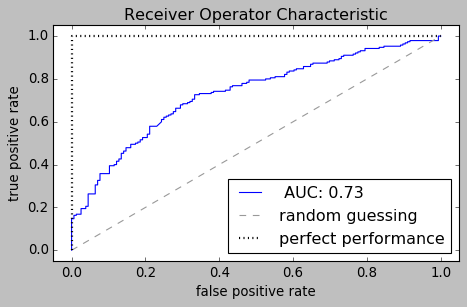

Accuracy: 0.66
Precision: 0.75
Specificity: 0.77
Sensitivity (recall): 0.58
F1: 0.65


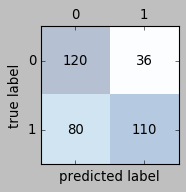

In [62]:
#1. SVM: data scaled (all features)
                
param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_all = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             SVC(kernel='poly', probability=True))

grid_svm_all = GridSearchCV(pipe_svm_all, param_grid, cv=5, scoring='roc_auc')
grid_svm_all.fit(X_train, y_train)

#eval
roc_curve(grid_svm_all, X_test, y_test)
scores(grid_svm_all, X_test, y_test)
confusion_matrix(grid_svm_all, X_test, y_test)

In [63]:
best_params(grid_svm_all)

{'svc__C': 10, 'svc__degree': 2}


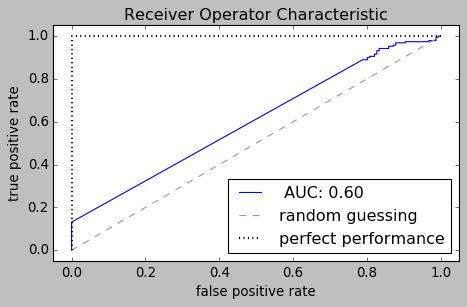

Accuracy: 0.61
Precision: 0.73
Specificity: 0.79
Sensitivity (recall): 0.45
F1: 0.56


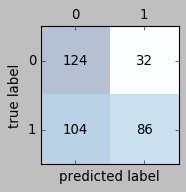

Index(['ma_1', 'ma_2', 'ma_5', 'ma_6', 'ex_1', 'ex_2', 'ex_3', 'ex_4', 'ex_7',
       'euclidean_dist', 'diameter_optic'],
      dtype='object')


In [64]:
#2. SVM: data scaled (RF selected  features)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_rf = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                            SelectFromModel(rfc),
                            SVC(kernel='poly', probability=True))

grid_svm_rf = GridSearchCV(pipe_svm_rf, param_grid, cv=5, scoring='roc_auc')
grid_svm_rf.fit(X_train, y_train)

#eval
roc_curve(grid_svm_rf, X_test, y_test)
scores(grid_svm_rf, X_test, y_test)
confusion_matrix(grid_svm_rf, X_test, y_test)

#get columns selected by random Forest
fs = grid_svm_rf.best_estimator_.named_steps["selectfrommodel"]
feature_idx =fs.get_support()
rf_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by Random Forest
print(rf_feature_names)

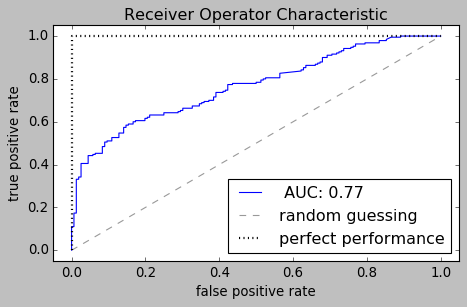

Accuracy: 0.64
Precision: 0.61
Specificity: 0.29
Sensitivity (recall): 0.92
F1: 0.73


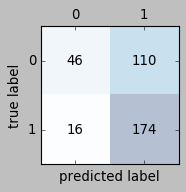

Index(['ma_1', 'ma_2', 'ma_4', 'ma_5', 'ma_6'], dtype='object')


In [65]:
#3. SVM: data scaled (RFE selected  features)

lr = LogisticRegression()
f5 = feature_selection.RFE(estimator=lr, n_features_to_select=5)

param_grid ={'svc__C': [0.001, 0.01, 0.1, 1, 10],
             'svc__degree': [2,3]}

pipe_svm_RFE = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             f5,
                             SVC(kernel='poly', probability=True))

grid_svm_RFE = GridSearchCV(pipe_svm_RFE, param_grid, cv=5, scoring='roc_auc')
grid_svm_RFE.fit(X_train, y_train)

#eval
roc_curve(grid_svm_RFE, X_test, y_test)
scores(grid_svm_RFE, X_test, y_test)
confusion_matrix(grid_svm_RFE, X_test, y_test)

#get columns selected by RFE
fs = grid_svm_RFE.best_estimator_.named_steps["rfe"]
feature_idx =fs.get_support()
RFE_feature_names = df.iloc[:,1:].columns[feature_idx]
#features chosen by RFE
print(RFE_feature_names)


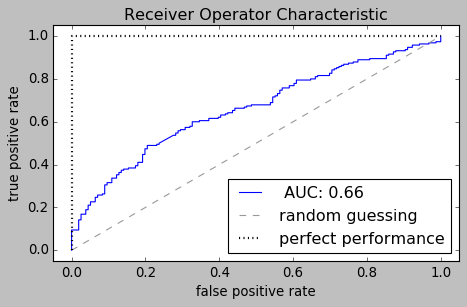

Accuracy: 0.62
Precision: 0.72
Specificity: 0.76
Sensitivity (recall): 0.49
F1: 0.59


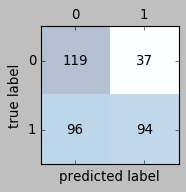

In [66]:
#4. SVM: data scaled with PCA 
warnings.filterwarnings('ignore')

param_grid ={'svc__C': [0.001, 0.01, 0.1],
             'svc__degree': [2,3]}

pipe_svm_pca = make_pipeline(CustomRobustScaler(bin_vars,cont_vars),
                             PCA(n_components=9),
                             SVC(kernel='poly', probability=True))

grid_svm_pca = GridSearchCV(pipe_svm_pca, param_grid, cv=5, scoring='roc_auc')
grid_svm_pca.fit(X_train, y_train)

#eval
roc_curve(grid_svm_pca, X_test, y_test)
scores(grid_svm_pca, X_test, y_test)
confusion_matrix(grid_svm_pca, X_test, y_test)

In [67]:
#compare all models by boxplot - this takes too long for SVM poly
# warnings.filterwarnings('ignore')

# results = []
# names = []
# msg =str()
# num_folds=5

# estimators = [('pipe_dummy', pipe_dummy),
#               ('grid_svm_all', grid_svm_all),
#               ('grid_svm_rf', grid_svm_rf),
#               ('grid_svm_RFE', grid_svm_RFE),
#               ('grid_svm_pca', grid_svm_pca)]

# for name, est in estimators:

#     cv_results = cross_val_score(est, X_train, y_train, cv=num_folds)
#     results.append(cv_results)
#     names.append(name)
#     msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'

  
# print ('\n\n***results***')
# print (msg)
# print('->', num_folds, '-Fold cross-validation accuracy score for the training data for', len(estimators),'classifiers') 
  
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle( 'SVM Polynomial with Scalar Pipeline comparison' )
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# ax.set_autoscaley_on(True)
# plt.show()


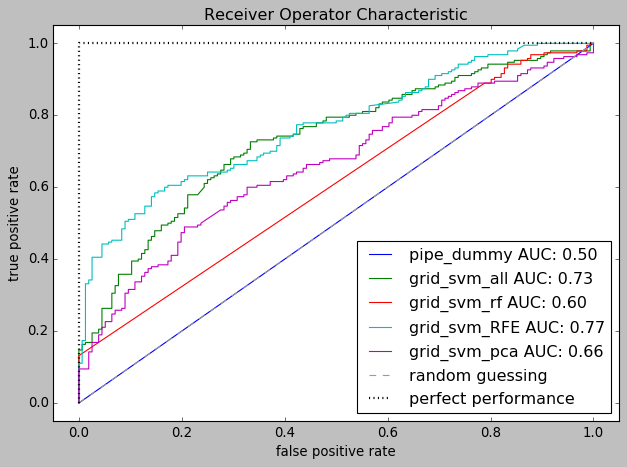

In [68]:
estimators = [('pipe_dummy', pipe_dummy),
              ('grid_svm_all', grid_svm_all),
              ('grid_svm_rf', grid_svm_rf),
              ('grid_svm_RFE', grid_svm_RFE),
              ('grid_svm_pca', grid_svm_pca)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

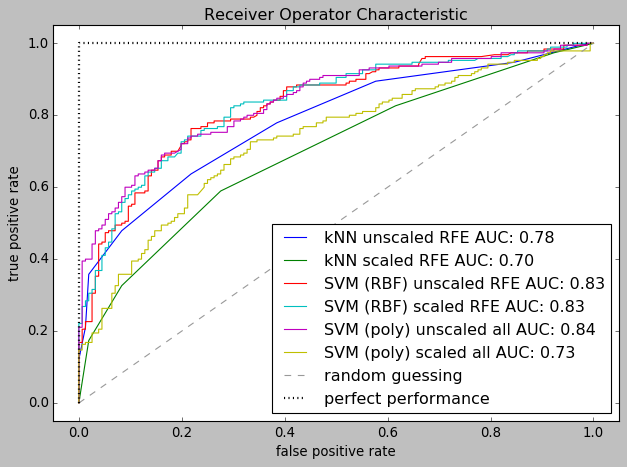

In [74]:
#ROC for best estimators in each category

estimators = [('kNN unscaled RFE', grid_knn_RFE_),
              ('kNN scaled RFE', grid_knn_RFE),
              ('SVM (RBF) unscaled RFE', grid_svm_r_RFE_),
              ('SVM (RBF) scaled RFE', grid_svm_r_RFE),
              ('SVM (poly) unscaled all', grid_svm_all_),
              ('SVM (poly) scaled all', grid_svm_all)]

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, est in estimators:
      
    #est.fit(X_train, y_train)
    
    probs = est.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)

    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()